## **Product Recommendations**

####Load the important Libraries

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

As I chose to use Colab IDE, So here I need to mount my drive to insert and modify respective data. Mount the drive.

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Upload the data, named as "Dataset - sheet1.csv".

In [181]:
from google.colab import files
uploaded = files.upload()

Saving Dataset - Sheet1.csv to Dataset - Sheet1 (6).csv


In [182]:
Data = pd.read_csv("Dataset - Sheet1.csv")
Data

,Order ID,Customer Name,Product,Region,"Sales ('000, USD)",Registered At,Purchased At,Refunded,Origin
0,1,Jones,A,South,500,12/01/18 02:00,12/06/18 18:59,False,referral
1,2,Kivell,B,East,400,12/01/18 12:23,12/06/18 19:54,False,display
2,3,James,G,North,100,12/01/18 13:49,13/06/18 16:37,False,social
3,4,Jack,F,West,200,12/01/18 16:07,14/06/18 14:30,False,social
4,5,Anny,B,Central,250,12/01/18 18:25,14/06/18 15:43,True,other
...,...,...,...,...,...,...,...,...,...
145,146,Thompson,C,South,300,22/02/18 21:25,01/11/18 15:36,False,social
146,147,Mathew,C,Central,110,23/02/18 11:40,06/11/18 19:41,False,organic_search
147,148,Gill,F,East,335,23/02/18 12:03,09/11/18 20:06,False,paid_search
148,149,Amy,A,South,235,23/02/18 13:54,12/11/18 19:17,False,social


####**Exploratory Data Analysis (EDA)**
By using .info() function, we can get Non-null count and Datatype of the all the columns. As we can see, Among 9 column, there is one 'Refunded' column's datatype is having 'bool'.

In [183]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           150 non-null    int64 
 1   Customer Name      150 non-null    object
 2   Product            150 non-null    object
 3   Region             150 non-null    object
 4   Sales ('000, USD)  150 non-null    int64 
 5   Registered At      150 non-null    object
 6   Purchased At       150 non-null    object
 7   Refunded           150 non-null    bool  
 8   Origin             150 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 9.6+ KB


## **Knock Knock! Null value, Are you there?**

In [184]:
Data.isnull().sum()

Order ID             0
Customer Name        0
Product              0
Region               0
Sales ('000, USD)    0
Registered At        0
Purchased At         0
Refunded             0
Origin               0
dtype: int64

##**What are the average prices of the products?**

Let's check the 'Product' column and other columns affect on the 'Product' column. It is really important because 'Product' column going to become our 'Target' or 'Label'.

and sort the values according to "Sales ('000, USD)".

In [185]:
Most_Sold_Product = Data.groupby(Data['Product']).mean().sort_values("Sales ('000, USD)",ascending=False)[:10]

Most_Sold_Product

,Order ID,"Sales ('000, USD)",Refunded
Product,,,
A,74.444444,411.388889,0.055556
B,75.571429,349.285714,0.107143
E,75.357143,318.571429,0.000000
C,99.863636,274.772727,0.045455
F,71.750000,263.125000,0.083333
D,71.700000,248.000000,0.000000
G,64.250000,182.916667,0.000000


In [186]:
Most_Sold_Product = Most_Sold_Product.rename(columns = {"Sales ('000, USD)": 'Avg.Selling price of Product (USD)'}, inplace = False)
Most_Sold_Product

,Order ID,Avg.Selling price of Product (USD),Refunded
Product,,,
A,74.444444,411.388889,0.055556
B,75.571429,349.285714,0.107143
E,75.357143,318.571429,0.000000
C,99.863636,274.772727,0.045455
F,71.750000,263.125000,0.083333
D,71.700000,248.000000,0.000000
G,64.250000,182.916667,0.000000


As we are able to see, Product and their respective average selling price value (Avg.Selling price of Product (USD)). 


Let's plot the this data for better visualization.

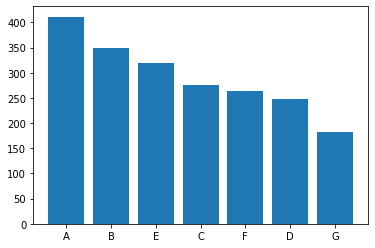

In [187]:
plt.bar(x = Most_Sold_Product.index, height=Most_Sold_Product["Avg.Selling price of Product (USD)"]);

## **Which product is most consumable?**

In [188]:
Consumption_of_product = Data['Product'].value_counts().sort_values(ascending = True)
Consumption_of_product

E    14
A    18
D    20
C    22
F    24
G    24
B    28
Name: Product, dtype: int64

So, the answer is product 'B'. and less consumable product is 'E'.

No handles with labels found to put in legend.


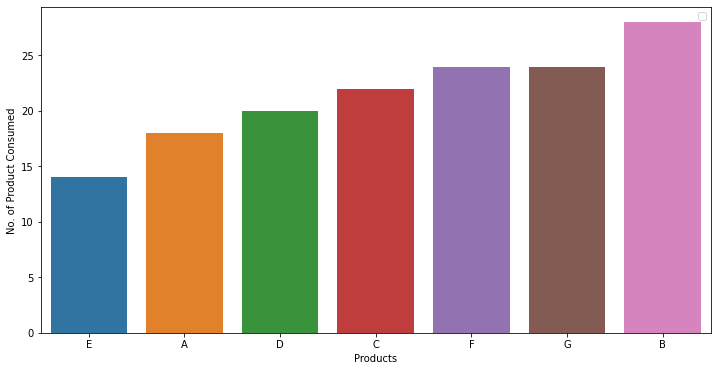

In [189]:
plt.figure(figsize=(12,6));

sns.barplot(x=Consumption_of_product.index, y=Consumption_of_product);

plt.xlabel ('Products')

plt.ylabel('No. of Product Consumed')

plt.legend();

As you know, If customer likes one type of particular product, then he again and again going to purchase the same. So, let's check, the Customer Vs. Product.

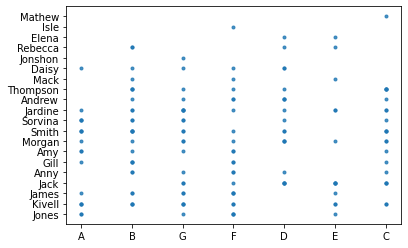

In [190]:
plt.plot(Data["Product"], Data["Customer Name"], '.',alpha = 50)

##**How many products are sold?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


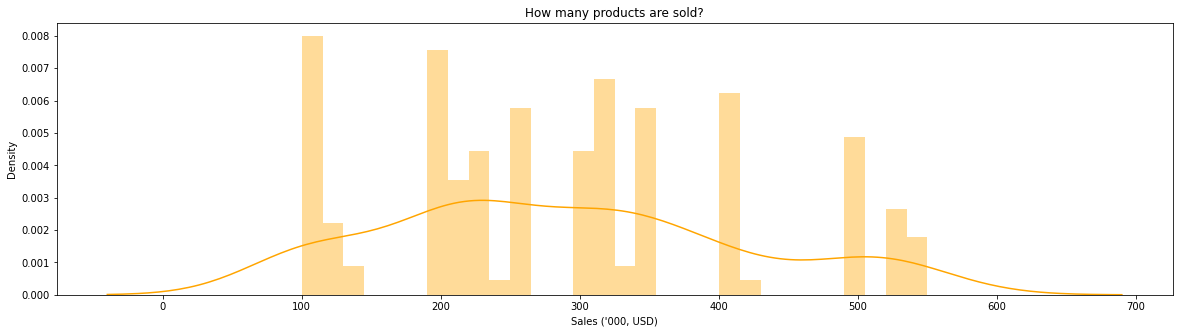

In [191]:
plt.subplots(figsize=(20,5))
sns.distplot(Data["Sales ('000, USD)"], kde=True, color="Orange", bins=30);


plt.title("How many products are sold?");

##**Whether is  there any correlation or dependencies?**

But as we can see, there is very negligible corelation between the two variables.

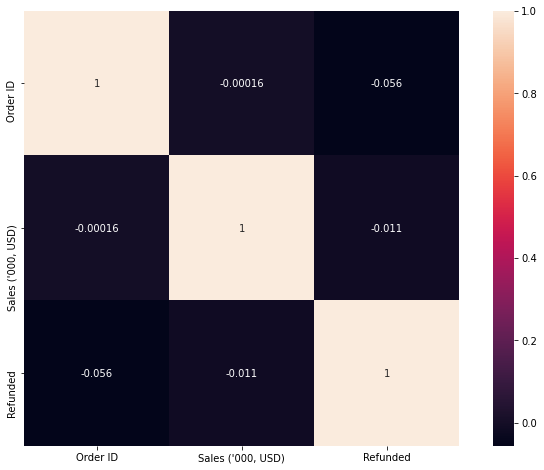

In [192]:
plt.subplots(figsize=(12, 8))
sns.heatmap(Data.corr(), annot=True, square=True)
plt.show()

**Pair plot also not showing patterns and trends.**

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


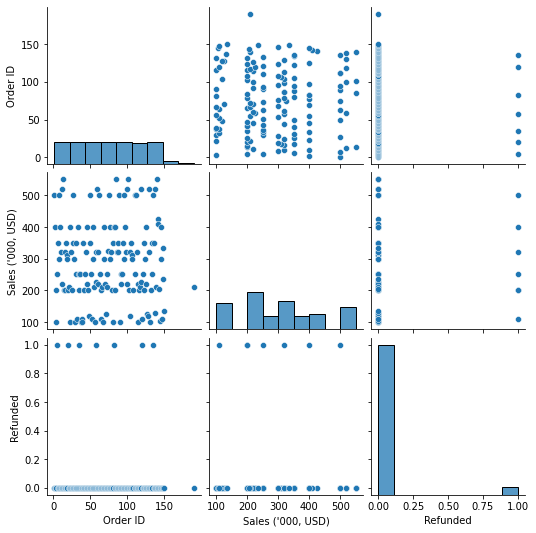

In [193]:
sns.pairplot(Data);

In [194]:
Most_Sold_Product

,Order ID,Avg.Selling price of Product (USD),Refunded
Product,,,
A,74.444444,411.388889,0.055556
B,75.571429,349.285714,0.107143
E,75.357143,318.571429,0.000000
C,99.863636,274.772727,0.045455
F,71.750000,263.125000,0.083333
D,71.700000,248.000000,0.000000
G,64.250000,182.916667,0.000000


## **How much time required to sell the product? (Purchased At - Registred At)**

Got, Some values which are negative! It might have happend while the insertion of data. Or Customer First purchased the product and the register.

In [195]:
Purchased_At = pd.to_datetime(Data["Purchased At"])
Registered_At = pd.to_datetime(Data["Registered At"])

Duration_required_to_sell_the_product = Purchased_At - Registered_At

Duration_required_to_sell_the_product = pd.DataFrame(Duration_required_to_sell_the_product)

print(Duration_required_to_sell_the_product)

                      0
0       5 days 16:59:00
1       5 days 07:31:00
2   -171 days +02:48:00
3   -171 days +22:23:00
4   -171 days +21:18:00
..                  ...
145  -43 days +18:11:00
146   108 days 08:01:00
147   200 days 08:03:00
148   291 days 05:23:00
149   263 days 21:37:00

[150 rows x 1 columns]


But this analysis, will not help us to predict the target values. Let's drop this Idea. It's really nice to examine that How much time required to sell the product?

##**Preprocessing and Feature Engineering**

Here, Need to split the target values and Feature values. 

Dataset is already balance here, So no need to apply 'SMOTE' algorithm.




In [196]:
Targets = Data["Product"]
Targets

0      A
1      B
2      G
3      F
4      B
      ..
145    C
146    C
147    F
148    A
149    B
Name: Product, Length: 150, dtype: object

As we know this is multiclass data, so we need to clear that by imputation technique. We are using here  "One hot encoding" (.get_dummies) technique for Imputation.

As you can see the result.

In [197]:
Targets = pd.get_dummies(Targets)
Targets

,A,B,C,D,E,F,G
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
145,0,0,1,0,0,0,0
146,0,0,1,0,0,0,0
147,0,0,0,0,0,1,0
148,1,0,0,0,0,0,0


Similarly, Extract the features from the data and process it for model fitting.

In [198]:
Features = Data.drop(["Order ID","Customer Name","Product","Region","Registered At","Purchased At","Refunded","Origin"], axis =1)
Features

,"Sales ('000, USD)"
0,500
1,400
2,100
3,200
4,250
...,...
145,300
146,110
147,335
148,235


As I got only one feature which can use for training. But before that, we need to impute it. So, import MinMax Scaler, because this feature having quantitative values so need to covert into array or sparse array.

As we can see below

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
Features= scaler.fit_transform(Features)

##**train-test split**

Let's do it.

X_train and y_train is having 70% of features and target values for trained the model. Whereas, X_test and y_test having 30% data on which trained model will be applied and predict the values or in this case recommend the values.

and check whether they applicable or not?

In [200]:
X_train, X_test, y_train, y_test = train_test_split(Features, Targets, test_size=0.3)

## **Model Creation,Fitting and Accuracy**

Let's Create Model

Here, I am using Random Forest Classifier, KNeighborsClassifier, Decision Tree classifier.

In [201]:
from sklearn.metrics import accuracy_score

#Apply  Random Forests
from sklearn.ensemble import RandomForestClassifier
 
randf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
 
randf_acc = apply_model(randf_model,X_train, X_test, y_train, y_test)
print('The accuracy of the Random Forest Classifier is', randf_acc)
 
 
#Apply knn
from sklearn.neighbors import KNeighborsClassifier
 
knn_acc = apply_model(KNeighborsClassifier(n_neighbors = 4),X_train, X_test, y_train, y_test)
print('The accuracy of the K Nearst Neighbors Classifier is', knn_acc)
 
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree_model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dtree_acc = apply_model(dtree_model,X_train, X_test, y_train, y_test)
print('The accuracy of the DecisionTree Classifier is', dtree_acc)
 
models = pd.DataFrame({
    'Model': ['Random Forest','KNN', 'DecisionTree Classifier'],
    'Score': [randf_acc, knn_acc, dtree_acc]})
models = models.sort_values(by='Score', ascending=False)
models = models.set_index('Score')
models

The accuracy of the Random Forest Classifier is 57.78
The accuracy of the K Nearst Neighbors Classifier is 60.0
The accuracy of the DecisionTree Classifier is 57.78


,Model
Score,
60.00,KNN
57.78,Random Forest
57.78,DecisionTree Classifier


The less accuracy is given by Decision Tree Classifier, Where as Random Forest and KNN are given the same.



Features are not enough to predict the correct values which is also called 'Generalization'. We need to understand that complexity of algorithm will hamper the accuracy this given is not 'Big data' 

Where as for simple data or for Normal data Linear or KNN classifier enough to predict. 

I also believe that nested loop will also give the best recommendation.




## **Recommendation** (Prediction)

In [202]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [207]:
y_pred

array([[0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0,

Here, y_pred is our Recommendations for products.

In [208]:
y_pred1 = pd.DataFrame(y_pred)
y_pred1.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1


Here, 0  means 'not recommendable'product and 1 means 'recommendable' product with respective to selling price of the product. 

Forexample: In 0th (zeroth) row, 'G' product recommendable. In 1st 'B' product recommendable.

In [209]:
Recommendations = y_pred1.rename(columns = {0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G"})
Recommendations.head()

,A,B,C,D,E,F,G
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1


**Conclusion:** If we observe data, we can see that data points are not sufficient to predict the values. Their involvement in training, fitting, application of model is negligible. we have already seen it in correlation and dependencies section. Some categorical columns (Features) are there but their values are not able affect the 'Targets'.

Still, I am able to predict the values upto the accuracy of 51.59%. The accuracy will change because of random training feature selction.

I would like to suggest that for this type of Datasets, which are simple and less complicated in nature. We can get the recommendation (Prediction) with simple algorithm like (KNN) or by just complicated nested loop.

 ###                                         **Submitted By:** Lavish P. Isasare